***
## Forecast of the total number of light duty vehicules
***

<u> Objectifs </u>
1. Forecast du nombre de véhicule total
2. Forecast du nombre de voitures et nombre de camions légers
<br>
<br>
<u> Tester plusieurs modèles </u>
- Régression linéaire
- Decision Tree
- etc

In [1]:
# Importation du module qui détermine les paths
import path

path_data = path.path_data
path_df = path.path_df
path_output = path.path_output

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_stock_forecast\Output\


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
cars_ld =       pd.read_hdf(path_df + 'cars_ld.h5')
pop_forecast =  pd.read_hdf(path_df + 'pop_forecast.h5')

In [5]:
cars_ld.head()

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758
3,2002,2729651,870812,3600463
4,2003,2799402,917540,3716942
5,2004,2847525,955337,3802862


In [101]:
# Régression linéaire
X = cars_ld['year'].values.reshape(-1,1)
y = cars_ld['total'].values

model = LinearRegression()
model.fit(X, y)

years_to_predict = np.arange(2022, 2050).reshape(-1,1)

prediction = model.predict(years_to_predict)

prediction

array([5113768.87012988, 5187167.8509317 , 5260566.83173349,
       5333965.81253532, 5407364.79333711, 5480763.77413893,
       5554162.75494072, 5627561.73574254, 5700960.71654433,
       5774359.69734615, 5847758.67814794, 5921157.65894976,
       5994556.63975158, 6067955.62055337, 6141354.6013552 ,
       6214753.58215699, 6288152.56295881, 6361551.5437606 ,
       6434950.52456242, 6508349.50536421, 6581748.48616603,
       6655147.46696782, 6728546.44776964, 6801945.42857143,
       6875344.40937325, 6948743.39017504, 7022142.37097687,
       7095541.35177869])

Mean Absolute Error: 30845.01
Mean Squared Error: 1461998973.34
Root Mean Squared Error: 38236.10
R carré: 0.99


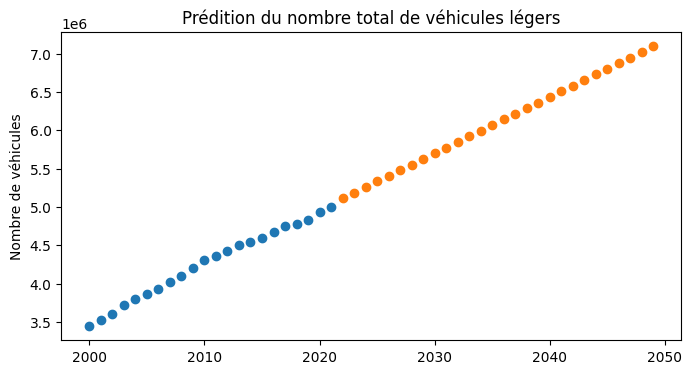

In [102]:
def prediction_manipulation(year_df, prediction):
    year_df = pd.DataFrame(year_df)
    prediction = pd.DataFrame(prediction)

    year_df = year_df.rename(columns={0:'year'})
    prediction = prediction.rename(columns={0:'prediction'}).astype(int)

    prediction_df = pd.concat([year_df,prediction], axis=1)

    # Ajouter au df original
    original_df = cars_ld[['year', 'total']].copy()
    final_df = pd.concat([original_df, prediction_df], axis=0)

    return final_df

final_df = prediction_manipulation(years_to_predict, prediction)

# r carrée
def print_results_metrics(model):
    mae = mean_absolute_error(y, model.predict(X))
    mse = mean_squared_error(y, model.predict(X))
    rmse = np.sqrt(mse)
    r2 = r2_score(y, model.predict(X))

    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    print(f'R carré: {r2:.2f}')
print_results_metrics(model)

# Plot the resuslts
plt.figure(figsize=(8,4))
plt.scatter(final_df['year'], final_df['total'])
plt.scatter(final_df['year'], final_df['prediction'])

plt.title('Prédition du nombre total de véhicules légers')
plt.ylabel('Nombre de véhicules')
plt.show()

### Interpretation
- faible MAE et RMSE indique que les prédictions sont près des valeurs actuelles
- R2 de 0.99 suppose que le modèle explique une très bonne partie de la relation
***

***
## Forecast of cars
***

In [56]:
cars_ld.head(2)

,year,vt,cl,total
1,2000,2629106,816997,3446103
2,2001,2678598,843160,3521758


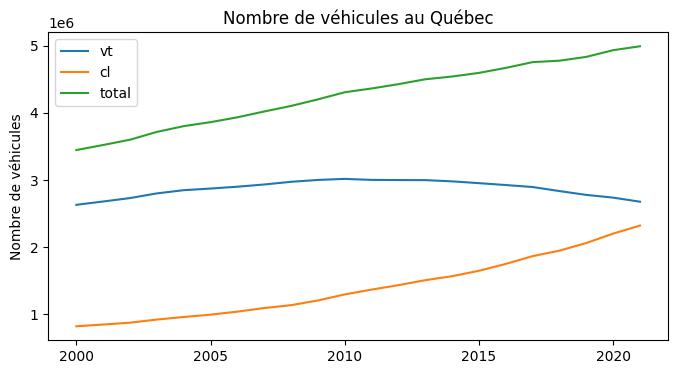

In [74]:
cols = ['vt', 'cl', 'total']

plt.figure(figsize=(8,4))
for col in cols:
    plt.plot(cars_ld['year'], cars_ld[col])

plt.title('Nombre de véhicules au Québec')
plt.legend(cols)
plt.ylabel('Nombre de véhicules')
plt.show()

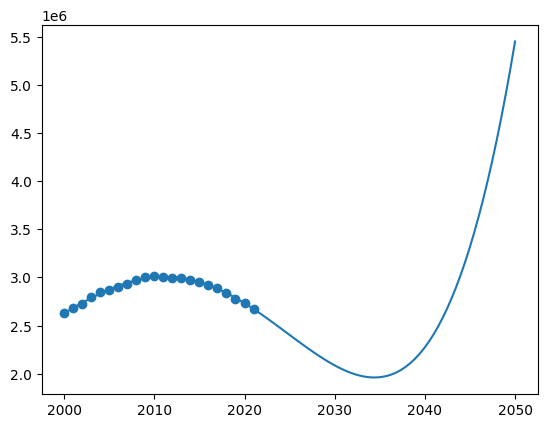

In [104]:
# Relation polynomiale : voitures
import numpy
X = cars_ld['year'].values.astype(float)
y = cars_ld['vt'].values.astype(float)

ploy_model = numpy.poly1d(numpy.polyfit(X, y, 4))

myline = numpy.linspace(2000, 2050, 100)
plt.scatter(X, y)
plt.plot(myline, ploy_model(myline))
plt.show()

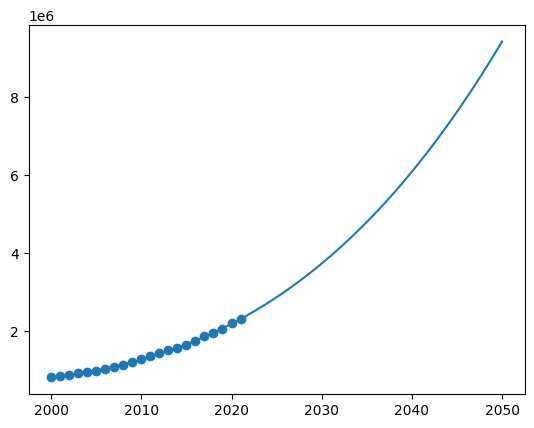

In [99]:
# Relation polynomiale : camion légers
X = cars_ld['year'].values.astype(float)
y = cars_ld['cl'].values.astype(float)

ploy_model = numpy.poly1d(numpy.polyfit(X, y, 3))

myline = numpy.linspace(2000, 2050, 100)
plt.scatter(X, y)
plt.plot(myline, ploy_model(myline))
plt.show()

***
